In [7]:
import pandas as pd

raw_data = pd.read_csv("stack-overflow-developer-survey-2022/survey_results_public.csv")

raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73268 entries, 0 to 73267
Data columns (total 79 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   ResponseId                      73268 non-null  int64  
 1   MainBranch                      73268 non-null  object 
 2   Employment                      71709 non-null  object 
 3   RemoteWork                      58958 non-null  object 
 4   CodingActivities                58899 non-null  object 
 5   EdLevel                         71571 non-null  object 
 6   LearnCode                       71580 non-null  object 
 7   LearnCodeOnline                 50685 non-null  object 
 8   LearnCodeCoursesCert            29389 non-null  object 
 9   YearsCode                       71331 non-null  object 
 10  YearsCodePro                    51833 non-null  object 
 11  DevType                         61302 non-null  object 
 12  OrgSize                         

In [9]:
revised_data = raw_data[["Age", "Country", "LanguageHaveWorkedWith", "LearnCode"]]

revised_data.head()

,Age,Country,LanguageHaveWorkedWith,LearnCode
0,NaN,NaN,NaN,NaN
1,NaN,Canada,JavaScript;TypeScript,NaN
2,25-34 years old,United Kingdom of Great Britain and Northern I...,C#;C++;HTML/CSS;JavaScript;Python,Books / Physical media;Friend or family member...
3,35-44 years old,Israel,C#;JavaScript;SQL;TypeScript,"Books / Physical media;School (i.e., Universit..."
4,25-34 years old,United States of America,C#;HTML/CSS;JavaScript;SQL;Swift;TypeScript,"Other online resources (e.g., videos, blogs, f..."


In [10]:
revised_data["Age"]

0                    NaN
1                    NaN
2        25-34 years old
3        35-44 years old
4        25-34 years old
              ...       
73263    25-34 years old
73264    25-34 years old
73265    55-64 years old
73266    55-64 years old
73267    25-34 years old
Name: Age, Length: 73268, dtype: object

In [12]:
revised_data["Age"].drop_duplicates()

0                     NaN
2         25-34 years old
3         35-44 years old
6      Under 18 years old
7         18-24 years old
9         45-54 years old
24        55-64 years old
77      65 years or older
451     Prefer not to say
Name: Age, dtype: object

In [18]:
revised_data.groupby(["Age"])

In [19]:
size_by_age = revised_data.groupby(["Age"]).size()
size_by_age

Age
18-24 years old       16646
25-34 years old       28112
35-44 years old       13988
45-54 years old        5281
55-64 years old        1978
65 years or older       554
Prefer not to say       521
Under 18 years old     3866
dtype: int64

In [20]:
size_by_country = revised_data.groupby(["Country"]).size()
size_by_country

Country
Afghanistan                              69
Albania                                  59
Algeria                                  36
Andorra                                  15
Angola                                   12
                                       ... 
Venezuela, Bolivarian Republic of...    119
Viet Nam                                317
Yemen                                    14
Zambia                                   20
Zimbabwe                                 30
Length: 180, dtype: int64

<Axes: xlabel='Age'>

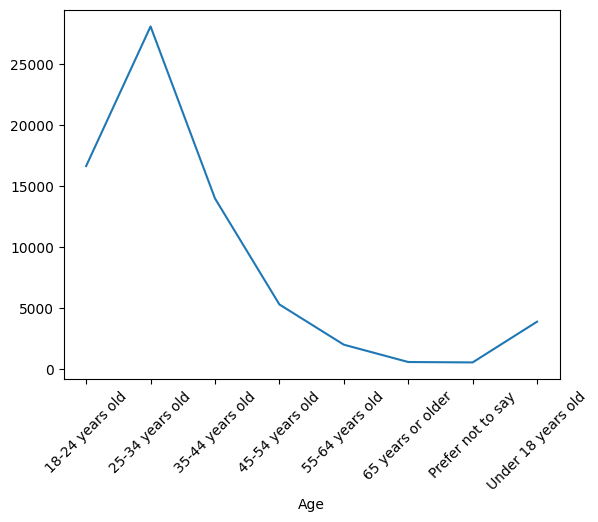

In [21]:
size_by_age.plot.line(rot=45)

<Axes: xlabel='Age'>

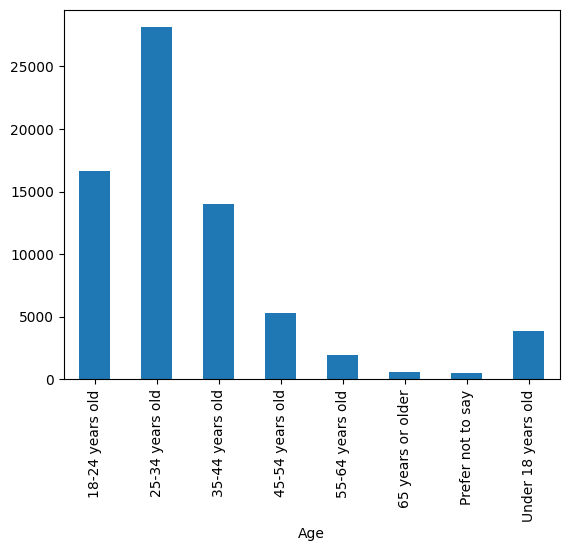

In [22]:
size_by_age.plot.bar()

<Axes: ylabel='Age'>

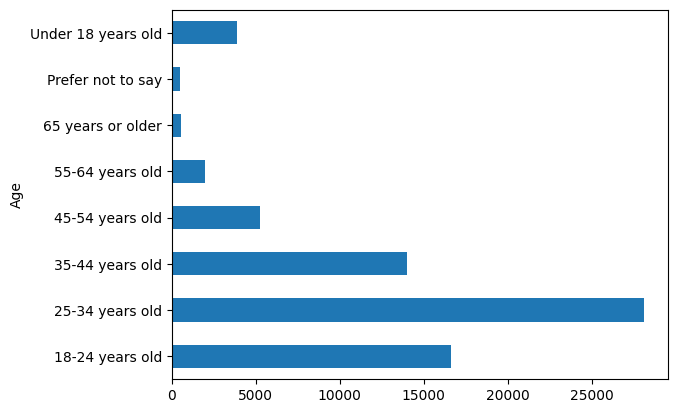

In [23]:
size_by_age.plot.barh()

In [24]:
size_by_age.index

Index(['18-24 years old', '25-34 years old', '35-44 years old',
       '45-54 years old', '55-64 years old', '65 years or older',
       'Prefer not to say', 'Under 18 years old'],
      dtype='object', name='Age')

In [33]:
reindxed_size_by_age = size_by_age.reindex(index=[
    'Prefer not to say',
    '65 years or older',
    '55-64 years old',
    '45-54 years old',
    '35-44 years old',
    '25-34 years old',
    '18-24 years old',
    'Under 18 years old'
])

reindxed_size_by_age

Age
Prefer not to say       521
65 years or older       554
55-64 years old        1978
45-54 years old        5281
35-44 years old       13988
25-34 years old       28112
18-24 years old       16646
Under 18 years old     3866
dtype: int64

<Axes: ylabel='Age'>

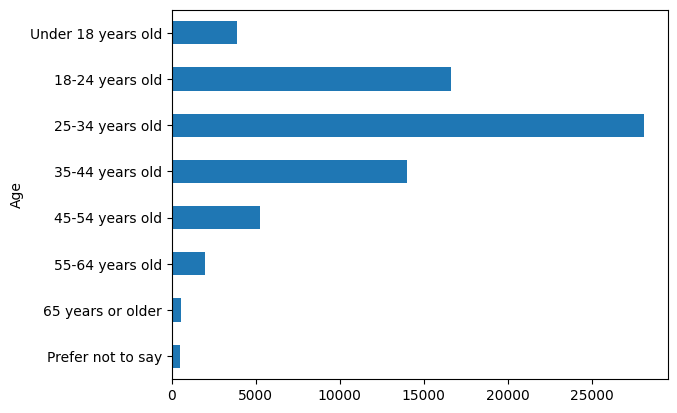

In [34]:
reindxed_size_by_age.plot.barh()

<Axes: >

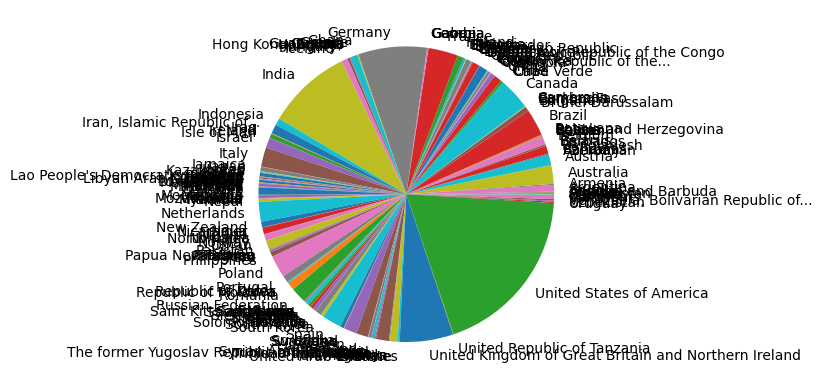

In [35]:
size_by_country.plot.pie()

<Axes: >

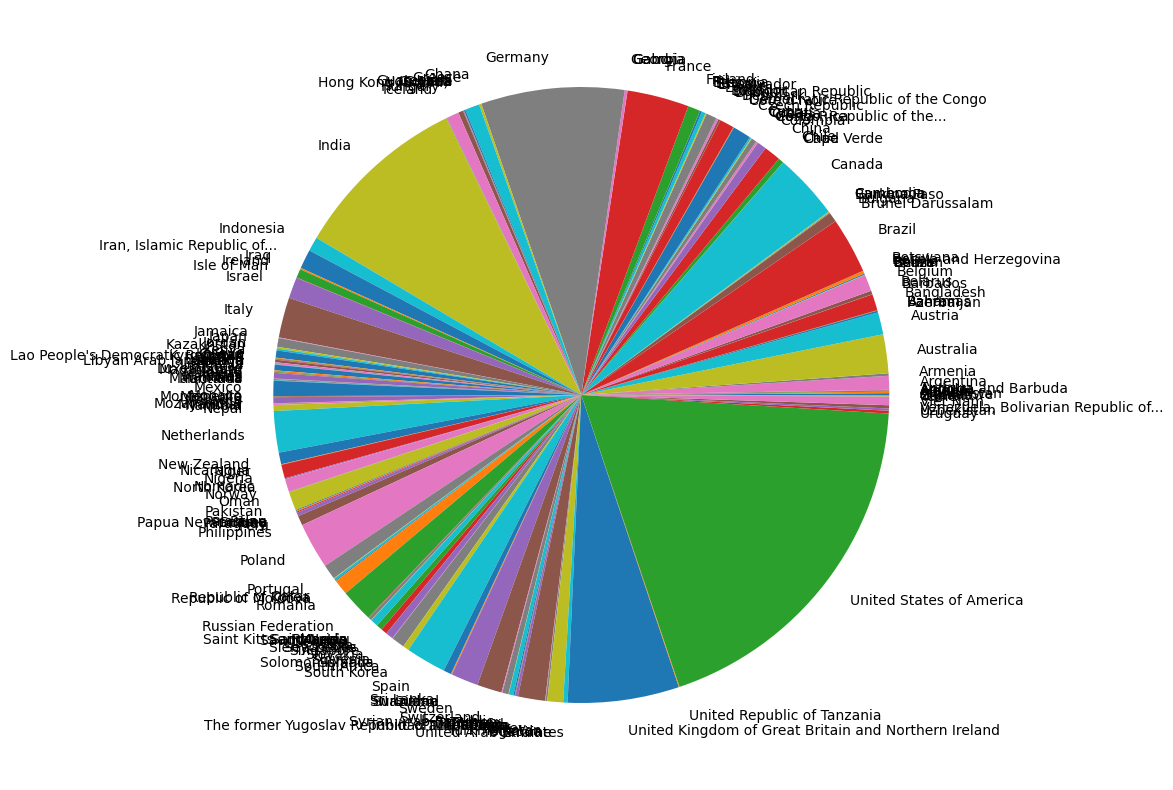

In [36]:
size_by_country.plot.pie(figsize=(10, 10)) 

<Axes: >

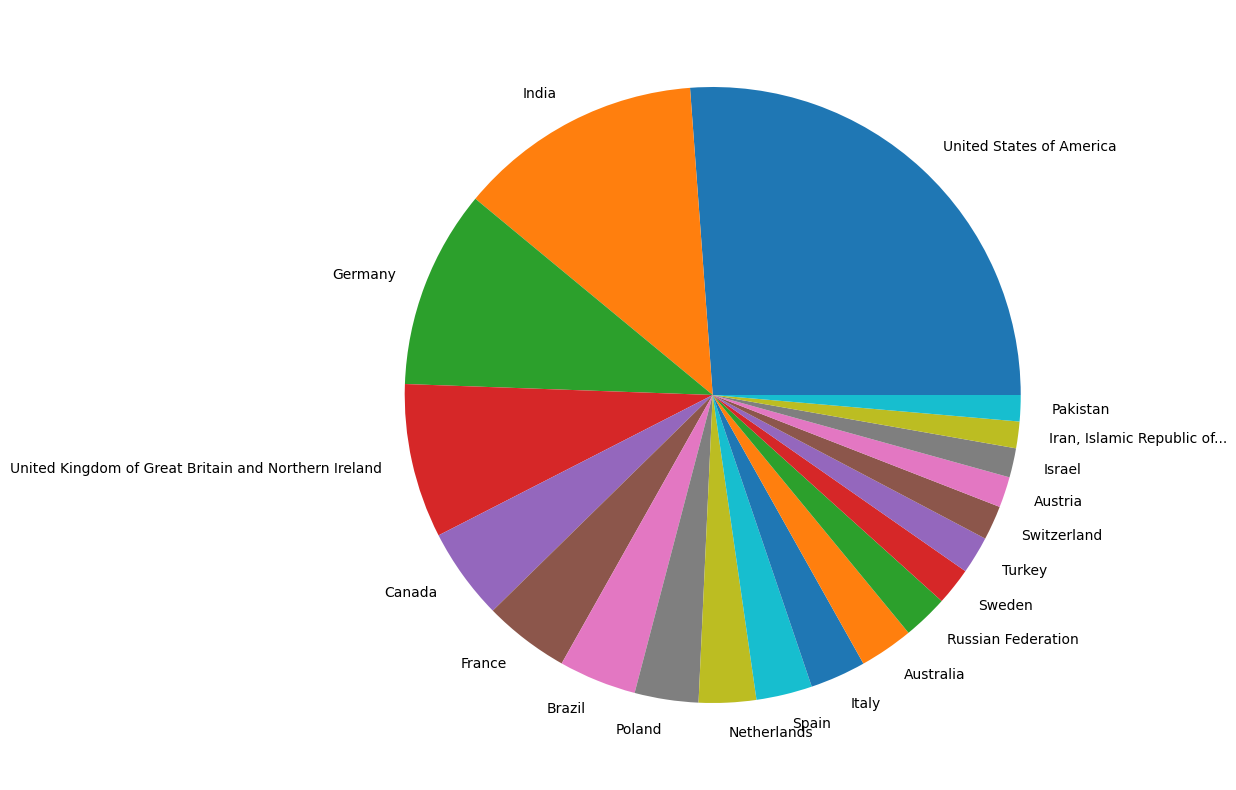

In [37]:
size_by_country.nlargest(20).plot.pie(figsize=(10, 10))

In [39]:
languages = revised_data["LanguageHaveWorkedWith"]

languages

0                                                      NaN
1                                    JavaScript;TypeScript
2                        C#;C++;HTML/CSS;JavaScript;Python
3                             C#;JavaScript;SQL;TypeScript
4              C#;HTML/CSS;JavaScript;SQL;Swift;TypeScript
                               ...                        
73263    Bash/Shell;Dart;JavaScript;PHP;Python;SQL;Type...
73264            Bash/Shell;HTML/CSS;JavaScript;Python;SQL
73265                   HTML/CSS;JavaScript;PHP;Python;SQL
73266                                        C#;Delphi;VBA
73267          C#;JavaScript;Lua;PowerShell;SQL;TypeScript
Name: LanguageHaveWorkedWith, Length: 73268, dtype: object

In [40]:
languages = languages.str.split(";")

languages

0                                                      NaN
1                                 [JavaScript, TypeScript]
2                  [C#, C++, HTML/CSS, JavaScript, Python]
3                        [C#, JavaScript, SQL, TypeScript]
4        [C#, HTML/CSS, JavaScript, SQL, Swift, TypeScr...
                               ...                        
73263    [Bash/Shell, Dart, JavaScript, PHP, Python, SQ...
73264      [Bash/Shell, HTML/CSS, JavaScript, Python, SQL]
73265             [HTML/CSS, JavaScript, PHP, Python, SQL]
73266                                    [C#, Delphi, VBA]
73267    [C#, JavaScript, Lua, PowerShell, SQL, TypeScr...
Name: LanguageHaveWorkedWith, Length: 73268, dtype: object

In [41]:
exploded_languages = languages.explode()

exploded_languages

0               NaN
1        JavaScript
1        TypeScript
2                C#
2               C++
            ...    
73267    JavaScript
73267           Lua
73267    PowerShell
73267           SQL
73267    TypeScript
Name: LanguageHaveWorkedWith, Length: 370114, dtype: object

In [42]:
size_by_langeuage = exploded_languages.groupby(exploded_languages).size()

size_by_langeuage

LanguageHaveWorkedWith
APL              504
Assembly        3887
Bash/Shell     20656
C              13692
C#             19883
C++            16024
COBOL            464
Clojure         1070
Crystal          340
Dart            4648
Delphi          2311
Elixir          1528
Erlang           641
F#               730
Fortran          646
Go              7922
Groovy          2357
HTML/CSS       39142
Haskell         1577
Java           23644
JavaScript     46443
Julia           1084
Kotlin          6507
LISP             932
Lua             2867
MATLAB          2913
OCaml            422
Objective-C     1698
PHP            14827
Perl            1644
PowerShell      8575
Python         34155
R               3308
Ruby            4299
Rust            6625
SAS              435
SQL            35127
Scala           1837
Solidity        1031
Swift           3489
TypeScript     24752
VBA             3185
Name: LanguageHaveWorkedWith, dtype: int64

<Axes: ylabel='LanguageHaveWorkedWith'>

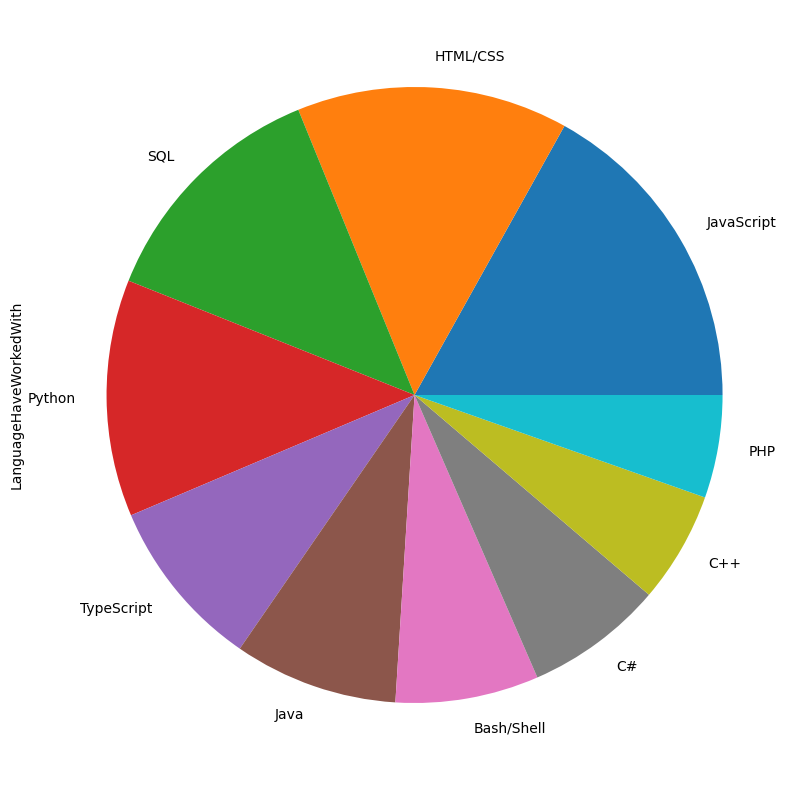

In [43]:
size_by_langeuage.nlargest(10).plot.pie(figsize=(10, 10))

<Axes: ylabel='LanguageHaveWorkedWith'>

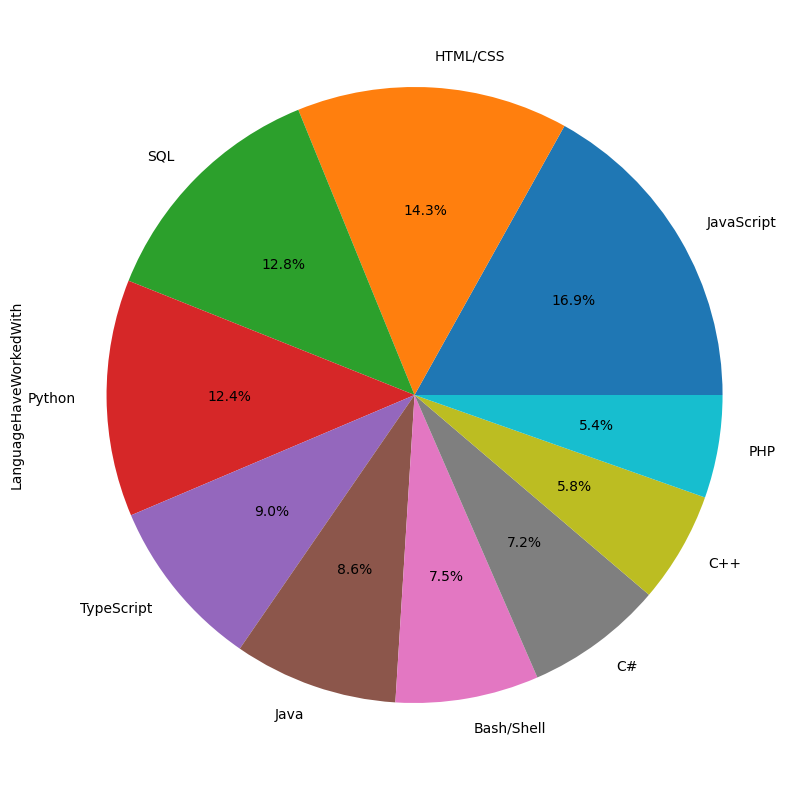

In [44]:
size_by_langeuage.nlargest(10).plot.pie(figsize=(10, 10), autopct='%1.1f%%')

In [45]:
languages_for_25_34 = revised_data[revised_data.Age == '25-34 years old']["LanguageHaveWorkedWith"].str.split(";").explode()

languages_for_25_34

2                C#
2               C++
2          HTML/CSS
2        JavaScript
2            Python
            ...    
73267    JavaScript
73267           Lua
73267    PowerShell
73267           SQL
73267    TypeScript
Name: LanguageHaveWorkedWith, Length: 137808, dtype: object

<Axes: ylabel='LanguageHaveWorkedWith'>

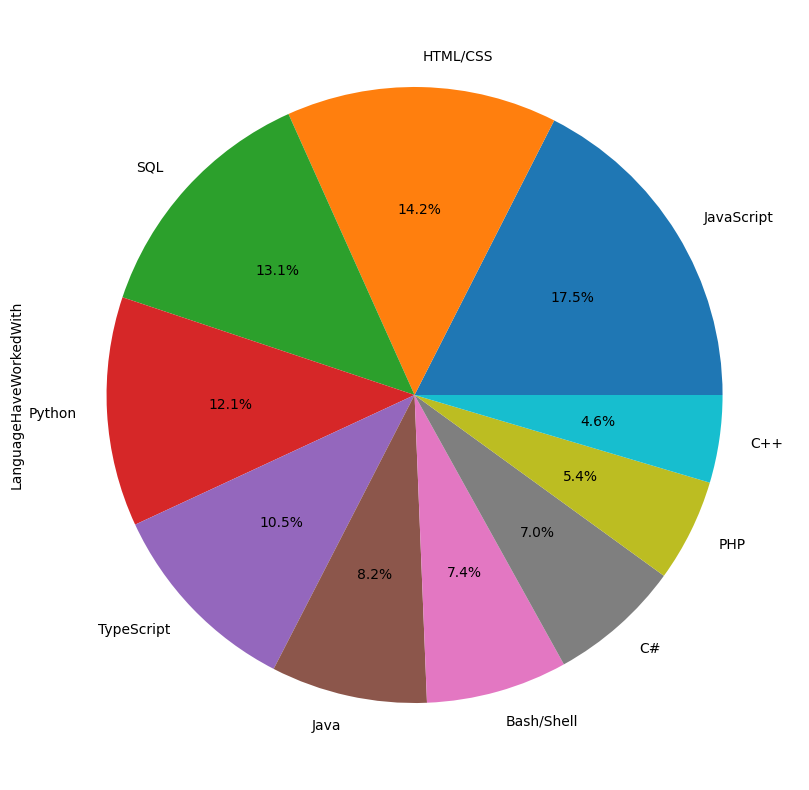

In [48]:
languages_for_25_34.groupby(languages_for_25_34).size().nlargest(10).plot.pie(figsize=(10, 10), autopct='%1.1f%%')

<Axes: ylabel='LearnCode'>

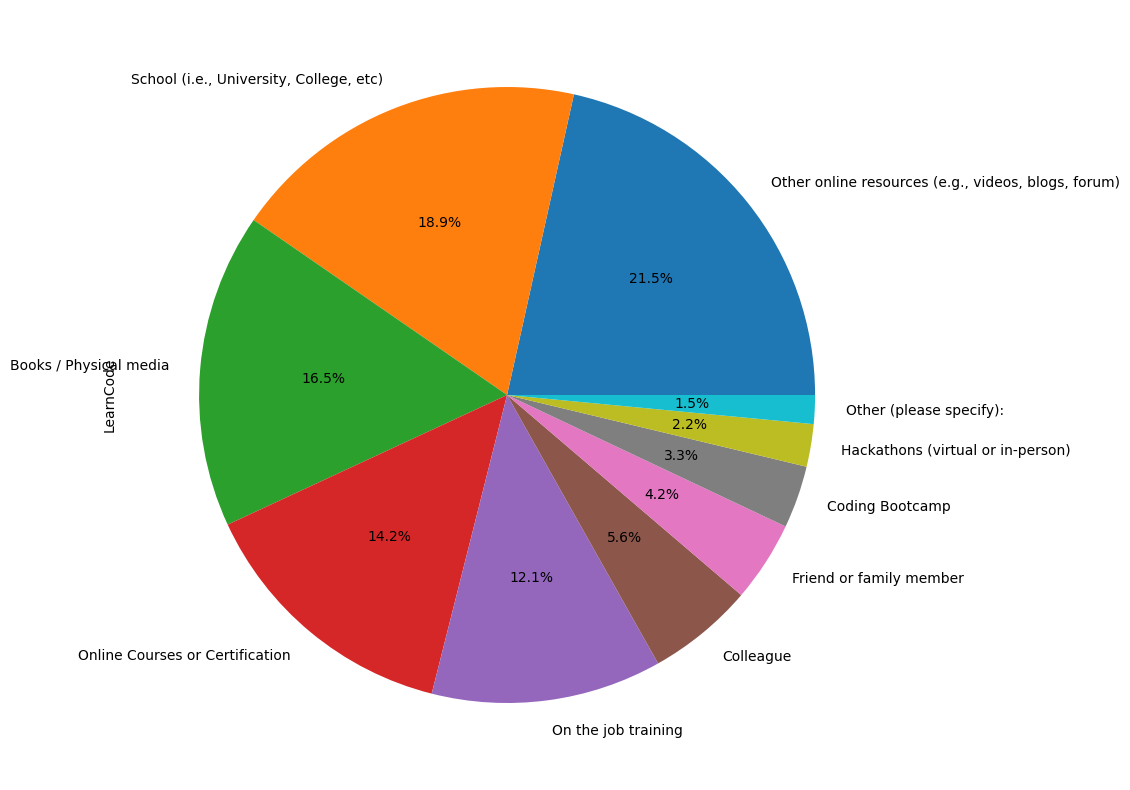

In [55]:
raw_data_2024 = pd.read_csv("stack-overflow-developer-survey-2024/survey_results_public.csv")

revised_data_2024 = raw_data[["Age", "Country", "LanguageHaveWorkedWith", "LearnCode"]]

learn = revised_data["LearnCode"]
learn = learn.str.split(";")
learn = learn.explode()
learn.groupby(learn).size().nlargest(10).plot.pie(figsize=(10, 10), autopct='%1.1f%%')

In [61]:
raw_data_2024 = pd.read_csv("stack-overflow-developer-survey-2024/survey_results_public.csv")
raw_data_2023 = pd.read_csv("stack-overflow-developer-survey-2023/survey_results_public.csv")
raw_data_2022 = pd.read_csv("stack-overflow-developer-survey-2022/survey_results_public.csv")
raw_data_2021 = pd.read_csv("stack-overflow-developer-survey-2021/survey_results_public.csv")

revised_data_2024 = raw_data[["Age", "Country", "LanguageHaveWorkedWith", "LearnCode"]]
revised_data_2023 = raw_data[["Age", "Country", "LanguageHaveWorkedWith", "LearnCode"]]
revised_data_2022 = raw_data[["Age", "Country", "LanguageHaveWorkedWith", "LearnCode"]]
revised_data_2021 = raw_data[["Age", "Country", "LanguageHaveWorkedWith", "LearnCode"]]

learn_2024 = revised_data_2024["LearnCode"]
learn_2023 = revised_data_2023["LearnCode"]
learn_2022 = revised_data_2022["LearnCode"]
learn_2021 = revised_data_2021["LearnCode"]

learn_2024 = learn_2024.str.split(";")
learn_2023 = learn_2023.str.split(";")
learn_2022 = learn_2022.str.split(";")
learn_2021 = learn_2021.str.split(";")

learn_2024 = learn_2024.explode()
learn_2023 = learn_2023.explode()
learn_2022 = learn_2022.explode()
learn_2021 = learn_2021.explode()

learn_all = pd.concat([learn_2024, learn_2023, learn_2022, learn_2021], ignore_index=True)
learn_all

0                                                       NaN
1                                                       NaN
2                                    Books / Physical media
3                                   Friend or family member
4         Other online resources (e.g., videos, blogs, f...
                                ...                        
950311    Other online resources (e.g., videos, blogs, f...
950312              School (i.e., University, College, etc)
950313                                  On the job training
950314                      Online Courses or Certification
950315                    Hackathons (virtual or in-person)
Name: LearnCode, Length: 950316, dtype: object